# CIS 5450 Homework 3: Hypothesis Testing and Machine Learning

*Due Date: **Friday, March 28 10:00 PM EST**<br>
**105 points total** (= 95 autograded + 10 manually graded).*

Welcome to CIS 5450 Homework 3! In this homework you will gain some familiarity with machine learning models for supervised learning. Over the next few days you will strengthen your understanding of hypothesis testing via simulation and ML concepts using various datasets. Some housekeeping below!<br><br>

<center>
<img src="https://storage.googleapis.com/kaggle-forum-message-attachments/703594/14673/DATAAC.jpeg" alt="drawing" width="500"/>
</center>

**Before you begin:**
- Be sure to click "Copy to Drive" to make sure you're working on your own personal version of the homework
- Check the pinned FAQ post on Ed for updates! If you have been stuck, chances are other students have also faced similar problems.

**Note:**  We will be manually checking your implementations and code for certain problems. If you incorrectly implemented a procedure using Scikit-learn (e.g. creating predictions on training dataset, incorrectly process training data prior to running certain machine learning models, hardcoding values, etc.), we will be enforcing a penalty system up to the maximum value of points allocated to the problem. (e.g. if your problem is worth 4 points, the maximum number of points that can be deducted is 4 points).
  - **Note:** If your plot is not run or not present after we open your notebook/pdf, we will deduct the entire manually graded point value of the plot. (e.g. if your plot is worth 4 points, we will deduct 4 points).
  - **Note:** If your `.py` file is hidden because it's too large, that's ok! We only care about your `.pdf` file.

# Part 0. Import and Setup

Import necessary libraries (do not import anything else!)

In [1]:
%%capture
!pip3 install penngrader-client

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import random
import math
import datetime as dt
from xgboost import XGBClassifier
from penngrader.grader import *
import inspect

###PennGrader Setup

In [3]:
# PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW
# TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 73619426
SECRET = "... watching Ted Lasso..."

In [4]:
%%writefile config.yaml

grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Overwriting config.yaml


In [5]:
%set_env HW_ID=cis5450_sp25_HW3

env: HW_ID=cis5450_sp25_HW3


In [6]:
grader = PennGrader('config.yaml', 'cis5450_sp25_HW3', STUDENT_ID, SECRET)

PennGrader initialized with Student ID: 73619426

Make sure this correct or we will not be able to store your grade


# Part 1: Hypothesis Testing via Simulation [23 Points Total] (3 manually graded points)

## 1.1: Birthday Paradox Simulation [9 points] (3 manually graded points)

The Birthday Paradox states that in a group of just 23 people, there's a greater than 50% chance that at least two people share the same birthday. This counterintuitive result demonstrates how our intuition about probability can often be misleading. In this problem, you'll implement a simulation to verify this mathematical result and explore how the probability changes with different group sizes.

For simplicity, we'll make the following assumptions:
- There are 365 possible birthdays (ignoring leap years)
- Birthdays are uniformly distributed throughout the year
- Births are independent events

### 1.1.1 Basic Simulation [2 points]

First, let's implement a basic simulation using loops to understand the problem.

TODO:
Implement a function `simulate_birthday_paradox_basic(n_people, n_simulations)` that:
- Takes two parameters:
    - n_people: The number of people in each simulated group
    - n_simulations: The number of random groups to simulate
- For each simulation:
    - Generates `n_people` random birthdays (integers from 1 to 366)
    - Checks if at least two people in the group share the same birthday
- Returns the proportion of simulations where a shared birthday occurred

**Hint**:
- Please check whether each side of `randint` is inclusive or not.


In [7]:
### DO NOT CHANGE ###
random.seed(42)
### DO NOT CHANGE ###

def simulate_birthday_paradox_basic(n_people, n_simulations=10000):
    """
    Simulates the birthday paradox for a given number of people using loops.

    Parameters:
    n_people (int): Number of people in each simulation
    n_simulations (int): Number of simulations to run

    Returns:
    float: Proportion of simulations with at least one shared birthday
    """
    # TODO: Implement this function using loops
    # Hint: Use random.randint(1, 366) to generate random birthdays
    # Hint: You can check for duplicates by comparing the length of a list with the length of a set

    shared_birthday_count = 0  # Initialize a counter for shared birthdays

    for _ in range(n_simulations):  # Run the simulation for the specified number of times
        birthdays = []  # Initialize an empty list to store birthdays for this simulation
        for _ in range(n_people):  # Generate birthdays for each person in the group
            birthdays.append(random.randint(1, 366))  # Generate a random birthday (1 to 366)

        # Check if there's a shared birthday by comparing the length of the list to the length of a set
        if len(birthdays) != len(set(birthdays)):
            shared_birthday_count += 1  # Increment the counter if there's a shared birthday

    # Calculate and return the proportion of simulations with shared birthdays
    return shared_birthday_count / n_simulations

# Test the function with 23 people
probability_23 = simulate_birthday_paradox_basic(23, 10000)
print(f"Probability of shared birthday with 23 people: {probability_23:.4f}")

Probability of shared birthday with 23 people: 0.5131


In [8]:
grader.grade(test_case_id = 'test_basic_simulation', answer = probability_23)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.1.2 Vectorized Simulation [4 points]

Next, let's accelerate our simulation with vectorization! Using numpy, write a vectorized version of the simulation.

Your solution must:
- Contain no loops (while, for, etc.) or list comprehensions
- Contain no if statements or conditionals
- Only use built-in or numpy np. functions
- Should make only a single call to `np.random`

TODO:
- Implement a function `simulate_birthday_paradox_vectorized(n_people, n_simulations)` that performs the same task as the basic simulation but uses vectorization for improved performance.

In [9]:
### DO NOT CHANGE ###
random.seed(42)
np.random.seed(42)
### DO NOT CHANGE ###

def simulate_birthday_paradox_vectorized(n_people, n_simulations=10000):
    """
    Simulates the birthday paradox for a given number of people using vectorization.

    Parameters:
    n_people (int): Number of people in each simulation
    n_simulations (int): Number of simulations to run

    Returns:
    float: Proportion of simulations with at least one shared birthday
    """
    # TODO: Generate all birthdays at once: shape (n_simulations, n_people)
    birthdays = np.random.randint(1, 366, size=(n_simulations, n_people))

    # TODO: Sort birthdays along each simulation (row-wise)
    sorted_birthdays = np.sort(birthdays, axis=1)

    # TODO: Check if there are any duplicates by comparing adjacent sorted birthdays
    duplicates = np.any(sorted_birthdays[:, 1:] == sorted_birthdays[:, :-1], axis=1)

    # TODO: Return the proportion of simulations with at least one shared birthday
    return np.mean(duplicates)

vectorized_code = inspect.getsource(simulate_birthday_paradox_vectorized)

# Compare execution times
print("Basic implementation:")
%time probability_23_basic = simulate_birthday_paradox_basic(23, 10000)
print(f"Probability: {probability_23_basic:.4f}")

print("\nVectorized implementation:")
%time probability_23_vec = simulate_birthday_paradox_vectorized(23, 10000)
print(f"Probability: {probability_23_vec:.4f}")

Basic implementation:
CPU times: user 248 ms, sys: 0 ns, total: 248 ms
Wall time: 816 ms
Probability: 0.5131

Vectorized implementation:
CPU times: user 9.4 ms, sys: 2.3 ms, total: 11.7 ms
Wall time: 96.6 ms
Probability: 0.5066


In [10]:
grader.grade(test_case_id='test_vectorized_simulation', answer=(probability_23_vec, vectorized_code))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.1.3 Probability Analysis [3 points] (3 manually graded points)

Now create a plot showing how the probability changes with group size from 1 to 60 people (i.e. range(1, 61)) using the calculation results from `simulate_birthday_paradox_vectorized()`.
Your plot with figure size (10, 6) should include:
- A curve showing the simulated probabilities
- An additional horizontal line at 0.5 (50% probability)
- An additional vertical line at n=23 people
- All labels for axes and a title 'Birthday Paradox: Probability vs. Group Size'

Hint: Please check `plt.axhline()` and `plt.axvline()` for additional lines.

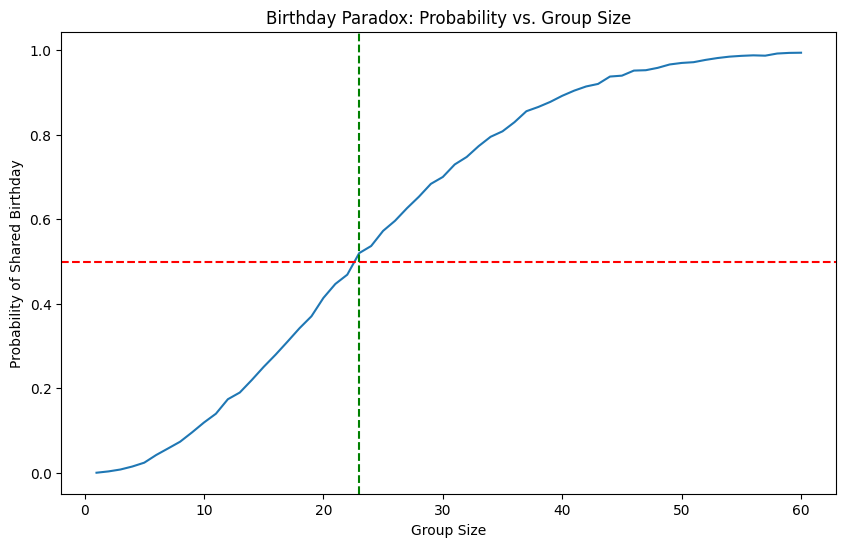

In [11]:
# TODO: Create a plot for group sizes 1 to 60 with probs from simulate_birthday_paradox_vectorized().
sizes = range(1, 61)
probs = [simulate_birthday_paradox_vectorized(size, 10000) for size in sizes]


# TODO: Implement the ploting content.

plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(sizes, probs)  # Plot the probabilities
plt.axhline(y=0.5, color='r', linestyle='--')  # Add horizontal line at 0.5
plt.axvline(x=23, color='g', linestyle='--')  # Add vertical line at n=23
plt.title('Birthday Paradox: Probability vs. Group Size')  # Set title
plt.xlabel('Group Size')  # Set x-axis label
plt.ylabel('Probability of Shared Birthday')  # Set y-axis label

plt.show()

## 1.2 Hypothesis Testing [14 points]

Now that you've explored the Birthday Paradox through simulation, let's analyze a dataset of birthdays to see if the theoretical assumptions hold in practice. The dataset `birthday_data.csv` contains birth date information for 10,000 individuals from different regions.

Dataset Description:
- `person_id`: Unique identifier for each person
- `birth_month`: Month of birth (1-12)
- `birth_day`: Day of birth (1-31)
- `birth_year`: Year of birth
- `region`: Geographic region (A, B, C, D, E)
- `gender`: Gender (M, F)


In [12]:
########## DO NOT CHANGE THIS BLOCK ##########

# Set random seed for reproducibility
np.random.seed(42)

# Generate 10,000 random people
n_people = 10000

# Create person IDs
person_ids = np.arange(1, n_people + 1)

# Generate birth years (between 1950 and 2000)
birth_years = np.random.randint(1950, 2001, n_people)

# Create non-uniform distribution of birthdays
# More births in summer and September, fewer in winter
weights = np.ones(12)
weights[[0, 1, 11]] *= 0.8  # Fewer births in winter (Jan, Feb, Dec)
weights[[6, 7, 8]] *= 1.2   # More births in summer (Jul, Aug, Sep)
weights[8] *= 1.1           # Even more in September
weights = weights / np.sum(weights)

# Generate birth months with non-uniform distribution
birth_months = np.random.choice(np.arange(1, 13), n_people, p=weights)

# Generate birth days (accounting for different month lengths)
birth_days = []
for month in birth_months:
    if month in [4, 6, 9, 11]:  # 30 days
        day = np.random.randint(1, 31)
    elif month == 2:  # February, simplifying to always 28 days
        day = np.random.randint(1, 29)
    else:  # 31 days
        day = np.random.randint(1, 32)
    birth_days.append(day)

birth_days = np.array(birth_days)

# Generate regions with different distributions
regions = np.random.choice(['A', 'B', 'C', 'D', 'E'], n_people, p=[0.3, 0.25, 0.2, 0.15, 0.1])

# Generate genders (slightly more females than males)
genders = np.random.choice(['M', 'F'], n_people, p=[0.48, 0.52])

# Create the dataframe
birthday_df = pd.DataFrame({
    'person_id': person_ids,
    'birth_month': birth_months,
    'birth_day': birth_days,
    'birth_year': birth_years,
    'region': regions,
    'gender': genders
})

# Add some regional variations in birth patterns
for region in ['A', 'B', 'C', 'D', 'E']:
    mask = birthday_df['region'] == region
    if region == 'A':  # Region A has more winter births
        idx = birthday_df.loc[mask & (birthday_df['birth_month'].isin([12, 1, 2]))].index
        n_shift = int(len(idx) * 0.2)
        birthday_df.loc[idx[:n_shift], 'birth_month'] = np.random.choice([12, 1, 2], n_shift)
    elif region == 'B':  # Region B has more spring births
        idx = birthday_df.loc[mask & (birthday_df['birth_month'].isin([3, 4, 5]))].index
        n_shift = int(len(idx) * 0.2)
        birthday_df.loc[idx[:n_shift], 'birth_month'] = np.random.choice([3, 4, 5], n_shift)

# Save to CSV
birthday_df.to_csv('birthday.csv', index=False)

print("Dataset created successfully!")

########## DO NOT CHANGE THIS BLOCK ##########

Dataset created successfully!


### 1.2.1 Load Data [2 points]

In hypothesis testing, we start by assuming a baseline called the null hypothesis. For this test, the null hypothesis (H₀) is that the Birthday Paradox does not hold true in generated data. This means that, under the null hypothesis, the probability of finding at least one shared birthday in a group of 23 people is not greater than 45%.

As a brief review, to determine whether we can reject or fail to reject the null hypothesis, we will:

1. Set up the hypotheses:
    -  **H₀: The probability of finding at least one shared birthday in a group of 23 people is ≤ 45%.**
    - **H₁: The probability of finding at least one shared birthday in a group of 23 people is > 45%.**

2. Analyze the data: We will calculate the observed proportion of groups with shared birthdays using the birthday dataset.

3. Simulate random outcomes: We will simulate a large number of random groups where birthdays are uniformly distributed throughout the year, assuming the null hypothesis is true.

4. Compare observed results to simulations: We will determine how often the simulated results produce shared birthday rates as extreme or more extreme than the observed data. This will give us a p-value, which tells us the likelihood of observing the current data under the null hypothesis.

5. Make a decision: Based on the p-value, we will decide whether to reject or fail to reject the null hypothesis:
    * If the p-value is below a **threshold** (in this case we'll use 0.08), we will reject the null hypothesis and conclude that home field advantage likely exists. Intuitively, a small p-value means that the data we observed is extremely unlikely to occur under the null hypothesis.
    * If the p-value is higher, we will fail to reject the null hypothesis, meaning the evidence is not strong enough to suggest home field advantage.

Before diving into the simulation, we need to load in the data first.

**TODO:**


*   Load `birthday.csv` and save the data to a dataframe called `birthday_df`.
*   Create a new column birthday that combines `birth_month` and `birth_day` to represent the day of the year (1-365), you can just use **2001** year as datetime parameter for simplicity.
*   Inspect the first five rows. There are many columns in this dataframe, but think about which ones we will actually need for hypothesis testing.

**Hint:**
* use `np.nan` to handle invalid dates.

In [13]:
# TODO: Load the dataset

birthday_df = pd.read_csv('birthday.csv')

# TODO: Create a function to convert month and day to day of year
def get_day_of_year(month, day):
    """
    Convert month and day to day of year (1-365)

    Parameters:
    month (int): Month (1-12)
    day (int): Day (1-31)

    Returns:
    int: Day of year (1-365)
    """
    # Hint: Use datetime to handle this conversion
    try:
        # Create a datetime object for the given month and day in 2001
        date = dt.datetime(2001, month, day)
        # Get the day of year (1-366) and adjust to (1-365)
        day_of_year = date.timetuple().tm_yday

        return day_of_year
    except ValueError:
        # Handle invalid dates by returning NaN
        return np.nan

# TODO: Apply the function to create a new column 'birthday'
birthday_df['birthday'] = birthday_df.apply(lambda row: get_day_of_year(row['birth_month'], row['birth_day']), axis=1)


birthday_df.head()

,person_id,birth_month,birth_day,birth_year,region,gender,birthday
0,1,6,12,1988,A,M,163.0
1,2,6,29,1978,A,F,180.0
2,3,3,3,1964,B,F,62.0
3,4,5,23,1992,C,M,143.0
4,5,7,22,1957,A,F,203.0


In [14]:
grader.grade(test_case_id='test_birthday_data', answer=birthday_df)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.2.2 Calculate Original Test Statistic [5 points]

Now, we'll calculate our test statistic: the proportion of randomly selected groups of 23 people that have at least one shared birthday.

TODO:

1. Write a function calculate_shared_birthday_proportion that:
    * Takes a dataframe and group size as input
    * Randomly samples a large number of groups of the specified size
    * For each group, checks if any birthdays are shared
    * Returns the proportion of groups with at least one shared birthday

2. Calculate this proportion for groups of size 23 with 10000 samples

3. Calculate the theoretical probability of at least one shared birthday in a group of n people. Do NOT use functions from 1.1.

In [20]:
### DO NOT CHANGE ###
np.random.seed(42)
### DO NOT CHANGE ###

def calculate_shared_birthday_proportion(data, group_size, n_samples=10000):
    """
    Calculate the proportion of randomly sampled groups with at least one shared birthday.

    Parameters:
    data (DataFrame): DataFrame containing birthday data
    group_size (int): Size of each random group
    n_samples (int): Number of random samples to take

    Returns:
    float: Proportion of samples with at least one shared birthday
    """
    # TODO: Implement this function
    # Hint: Use data.sample(group_size) to randomly sample people

    shared_birthday_count = 0
    for _ in range(n_samples):
        # Randomly sample a group of people
        group = data.sample(group_size, replace=False)['birthday'].values

        # Check if any birthdays are shared
        if len(group) != len(np.unique(group)):
            shared_birthday_count += 1

    # Calculate and return the proportion
    return shared_birthday_count / n_samples


# TODO: Calculate the observed proportion for groups of size 23
observed_proportion = calculate_shared_birthday_proportion(birthday_df, 23, n_samples=10000)


# TODO: Calculate the theoretical probability
def theoretical_probability(n):
    """
    Calculate the theoretical probability of shared birthdays for a group of n people.

    Parameters:
    n (int): Number of people in the group

    Returns:
    float: Theoretical probability of at least one shared birthday
    """
    # TODO: Implement this function
    prob_no_shared = 1.0
    for i in range(n):
        prob_no_shared *= (365 - i) / 365

    # The probability of at least one shared birthday is 1 minus the probability of no shared birthdays
    return 1 - prob_no_shared


theoretical_prob = theoretical_probability(23)

print(f"Observed proportion of groups with shared birthdays: {observed_proportion:.4f}")
print(f"Theoretical probability: {theoretical_prob:.4f}")
print(f"Difference: {abs(observed_proportion - theoretical_prob):.4f}")

Observed proportion of groups with shared birthdays: 0.5142
Theoretical probability: 0.5073
Difference: 0.0069


In [21]:
grader.grade(test_case_id='test_birthday_statistic', answer=(observed_proportion, theoretical_prob))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.2.3 Simulate Under the Null Hypothesis [4 points]

Under the null hypothesis, the probability of finding at least one shared birthday in a group of 23 people is not greater than 45%. Let's simulate this scenario. For 45%, we just set the adjuested days to 380 for better calculation.

TODO:

1. Write a function simulate_null_hypothesis that:
    * Simulates a large number of random groups of 23 people as uniformly distributed birthdays with 1000 simulations and 1000 samples per simulation
    * For each group, checks if any birthdays are shared
    * Returns the proportion of groups with at least one shared birthday


In [22]:
### DO NOT CHANGE ###
np.random.seed(42)
### DO NOT CHANGE ###

def simulate_null_hypothesis(group_size=23, n_simulations=1000, n_samples=1000):
    """
    Simulate the null hypothesis that birthdays are uniformly distributed.

    Parameters:
    group_size (int): Size of each group
    n_simulations (int): Number of simulations to run
    n_samples (int): Number of samples per simulation

    Returns:
    numpy.ndarray: Array of proportions from each simulation
    """

    # For 23 people, we need to solve: 1 - (n!/(n-23)! × n^23) = 0.45
    # This is approximately n = 380 days

    adjusted_days = 380  # This gives approximately 45% probability for 23 people


    # TODO: Implement this function
    # Hint: Use np.random.randint(1, adjusted_days+1, (n_samples, group_size)) to generate random birthdays

    proportions = []
    for _ in range(n_simulations):
        # Generate random birthdays for all samples in this simulation
        birthdays = np.random.randint(1, adjusted_days + 1, size=(n_samples, group_size))

        # Check for shared birthdays in each sample
        shared_birthdays = np.any(np.diff(np.sort(birthdays, axis=1), axis=1) == 0, axis=1)

        # Calculate and store the proportion for this simulation
        proportions.append(np.mean(shared_birthdays))

    return np.array(proportions)  # Return as a NumPy array


# Calculate summary statistics of the null distribution
null_proportions = simulate_null_hypothesis()
mean_null = np.mean(null_proportions)
std_null = np.std(null_proportions)

print(f"Mean of null distribution: {mean_null:.4f}")
print(f"Standard deviation of null distribution: {std_null:.4f}")

Mean of null distribution: 0.4928
Standard deviation of null distribution: 0.0153


In [23]:
grader.grade(test_case_id='test_birthday_null', answer=(mean_null, std_null))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.2.4 P-value and Decision [3 points]

Now, we'll calculate the p-value and make a decision about our hypothesis.

TODO:

1. Calculate the p-value as the proportion of simulations under the null hypothesis from 1.2.3 that produced a proportion of shared birthdays greater than or equal to the observed proportion from 1.2.2

2. Based on the p-value, decide whether to reject or fail to reject the null hypothesis:
    - If p-value < 0.08, reject the null hypothesis, and set decision = "Reject"
    - Otherwise, fail to reject the null hypothesis, and set decision = "Accept"

In [24]:
# TODO: Calculate the p-value
p_value = np.mean(null_proportions >= observed_proportion)

print(f"p-value: {p_value:.6f}")

# TODO: Make a decision based on the p-value
alpha = 0.08
if p_value < alpha:
    print(f"Since p-value ({p_value:.6f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("There is sufficient evidence to suggest that the Birthday Paradox could be true in synthesized data with 45% threshold.")
else:
    print(f"Since p-value ({p_value:.6f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("There is insufficient evidence to suggest that the Birthday Paradox holds true in synthesized data even with 45% threshold.")

decision = "Reject" if p_value < alpha else "Accept"

p-value: 0.078000
Since p-value (0.078000) < alpha (0.08), we reject the null hypothesis.
There is sufficient evidence to suggest that the Birthday Paradox could be true in synthesized data with 45% threshold.


In [25]:
grader.grade(test_case_id='test_birthday_pvalue', answer=(p_value, alpha, decision))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Part 2. Linear Regression and Hypothesis Testing [Total 40 points]

## 2.1 Load and Proprocess data [20 Points]
In this section, we will use this [properties dataset](https://www.kaggle.com/datasets/dataregress/dubai-properties-dataset/data) from Kaggle to explore linear regression, interpret its results, and perform coefficients hypothesis testings. Our goal is to model the relationship between the price of a house and all of its other features.

In supervised machine learning, regression and classification are two foundational tasks. While classification focuses on predicting discrete labels or categories, regression is concerned with predicting continuous values. One of the simplest and most widely used techniques for regression is linear regression, which models the relationship between input features and a continuous target variable by fitting a linear equation to the data.

To load the data:
1. Go to this [Kaggle link](https://www.kaggle.com) and create a Kaggle account (unless you already have one)
2. Go to Settings, scroll down to the "API" section and click on "Create New Token" to get the API key in the form of a json file `kaggle.json`
3. Upload the `kaggle.json` file to the default location in your Google Drive (Please **DO NOT** upload the json file into any _specific_ folder as it will be difficult for us to debug issues if you deviate from these instructions!).

This can be helpful for your project if you decide to use Kaggle for your final project or for future projects!

In [26]:
# Run this cell to mount your drive (you will be prompted to sign in)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Create the kaggle directory and
# (NOTE: Do NOT run this cell more than once unless restarting kernel)
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [28]:
# Read the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [29]:
# Download dataset
!kaggle datasets download -d dataregress/dubai-properties-dataset

Dataset URL: https://www.kaggle.com/datasets/dataregress/dubai-properties-dataset
License(s): CC0-1.0
dubai-properties-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [30]:
# Unzip folder in Colab content folder
!unzip /content/dubai-properties-dataset.zip

Archive:  /content/dubai-properties-dataset.zip
replace properties_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: properties_data.csv     


In [31]:
# TODO: Read the csv file and save it to a dataframe called "properties_df"
properties_df = pd.read_csv('properties_data.csv')

# Check out the first five rows
properties_df.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [32]:
# Look at the data types in properties_df
properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1905 non-null   int64  
 8   no_of_bathrooms      1905 non-null   int64  
 9   quality              1905 non-null   object 
 10  maid_room            1905 non-null   bool   
 11  unfurnished          1905 non-null   bool   
 12  balcony              1905 non-null   bool   
 13  barbecue_area        1905 non-null   bool   
 14  built_in_wardrobes   1905 non-null   bool   
 15  central_ac           1905 non-null   b

### 2.1.1 Encode [5 points]
For linear regression to run, it only accepts numerical values, so we need to convert all non-numerical columns into numerical ones. All of the non-numerical columns we want to consider are booleans, so we can encode them by casting the type of their columns to integers.

Task:
- Save a copy of the current table as `encoded_properties_df`
- Drop the columns `id, price_per_sqft, latitude, longitude, neighborhood, and quality` from `encoded_properties_df`. We are doing this because `id`, `latitude`, and `longitude` are unlikely to have numerical significance, `quality` and `price_per_sqft` are too similar to our target variable, and there are too many categories for `neighborhood`
- Create a list of all categorical features (boolean type) and save it as `categorical_features`
- Create a list of all numerical features (non-boolean type) and save it as `numerical_features` to be used later. Do not include the `price` column in this list, as it will be our target variable
- Cast all categorical feature columns to integer type to encode them as either 0 or 1

In [33]:
# DO NOT EDIT
encoded_properties_df = properties_df.copy()

In [34]:
# TODO: drop columns from `df_properties`
encoded_properties_df  = encoded_properties_df.drop(['id', 'price_per_sqft', 'latitude', 'longitude', 'neighborhood', 'quality'], axis=1)

In [35]:
# TODO: create a list of all categorical features
categorical_features = encoded_properties_df .select_dtypes(include=['bool']).columns.tolist()

# TODO: create a list of all numerical features
numerical_features = encoded_properties_df .select_dtypes(exclude=['bool']).drop('price', axis=1).columns.tolist()

# TODO: cast all categorical features to integer type
for feature in categorical_features:
    encoded_properties_df[feature] = encoded_properties_df[feature].astype(int)

In [36]:
# self-check: no need to change datatypes for this section
encoded_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   price                1905 non-null   int64
 1   size_in_sqft         1905 non-null   int64
 2   no_of_bedrooms       1905 non-null   int64
 3   no_of_bathrooms      1905 non-null   int64
 4   maid_room            1905 non-null   int64
 5   unfurnished          1905 non-null   int64
 6   balcony              1905 non-null   int64
 7   barbecue_area        1905 non-null   int64
 8   built_in_wardrobes   1905 non-null   int64
 9   central_ac           1905 non-null   int64
 10  childrens_play_area  1905 non-null   int64
 11  childrens_pool       1905 non-null   int64
 12  concierge            1905 non-null   int64
 13  covered_parking      1905 non-null   int64
 14  kitchen_appliances   1905 non-null   int64
 15  lobby_in_building    1905 non-null   int64
 16  maid_service         190

In [37]:
# Grader Cell (5 points)
grader.grade(test_case_id = 'properties_encode', answer = (categorical_features, numerical_features, encoded_properties_df))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.1.2 Train-Test-Split [2 points]

The overall goal of this regression tasks is the use the independent variables we have to make a prediction on the price of the property, so the `price` column will be our target<br>


Conduct a train-test split on `encoded_properties_df`, assigning **80%** of the data to the training set and the remaining **20%** to the testing set. This ensures that the encoding and scaling we perform later are fitted only on the training data, preventing any spillover from the test data.

- Name the outputs as `X_train`, `X_test`, `y_train`, and `y_test`.
- Pass the argument `random_state = seed` in the function to fix the random state, ensuring consistency in our results.

The documentation of train_test_split can be found: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [38]:
# DO NOT EDIT
seed = 42

In [39]:
# TODO: perform train_test_split on encoded_properties_df
# Assuming 'encoded_properties_df' is your DataFrame and 'price' is the target column
X = encoded_properties_df.drop('price', axis=1)  # Features
y = encoded_properties_df['price']  # Target variable

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

In [40]:
# Grader Cell (2 points)
grader.grade(test_case_id = 'properties_train_test_split', answer = (X_train, X_test, y_train, y_test))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.1.3 Scaling [3 points]

As the final step in data pre-processing, we will prepare a scaled version of the data. Scaling refers to the process of mapping your features to a new range of values. This often helps machine learning models learn and converge faster. Some machine learning models are not *scale invariant*, meaning their ability to learn from the data can be impacted by the scale of the features. For example, models might give more influence to features with larger scales, implying that these features are more important than others, even when they should be treated with similar importance. Scaling features helps mitigate this issue.

There are several strategies for scaling, but in this section we will use **Standardization** on our continuous numerical features. Standardizing the data ensures that each feature is centered around zero ($\mu=0$) and has unit variance ($\sigma^2=1$).

**Task:**

* Apply standardization to the `numerical_features` in both the training and testing datasets using `StandardScaler` from sklearn
  * Make sure to include only the original numerical columns and not the newly encoded ones
* Store the results in `X_train_scaled` and `X_test_scaled`

**Note:**

* Prevent data leakage by ensuring that scaling parameters are learned only from the training set.
* While we only transform the original numerical columns, `X_train_scaled` and `X_test_scaled` should have the same shape as `X_train_encoded_full` and `X_test_encoded_full` from the end of section 2.1.2.

The documentation for StandardScaler can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [41]:
# DO NOT EDIT
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [42]:
# TODO: instantiate a StandardScaler object
scaler = StandardScaler()
# TODO: fit and transform on relevant columns from the training data
scaler.fit(X_train[numerical_features])

# TODO: transform relevant columns from the testing data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_features] = scaler.transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

Print the head of your df to see if the transformed columns' values make sense

In [43]:
X_train_scaled.head()

,size_in_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
812,1.127365,1.285056,0.450158,0,1,0,0,1,1,1,...,0,0,1,1,0,0,0,1,0,0
141,1.015458,1.285056,1.400353,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1302,1.134217,1.285056,1.400353,1,1,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,1
1124,0.195569,0.207814,0.450158,0,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
1779,-0.540961,-0.869428,-0.500037,0,1,0,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0


In [44]:
# Grader Cell (3 points)
grader.grade(test_case_id = 'properties_scaling', answer = (X_train_scaled, X_test_scaled))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.1.4 Unregularized [5 points]

Use the `LinearRegression` class ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) in scikit-learn to perform Linear Regression. Initialize a Linear regression model named `lr` with default parameters, fit the model to the training set, and then make predictions on the testing set.

Save your test predictions in an array named `y_pred_lr`, and report your [R-squared score](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) for both train and test predictions

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# TO-DO: Initialize model with default parameters and fit it on the training set
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred_lr`
y_pred_lr = lr.predict(X_test_scaled)
# TO-DO: Find the R-squared score for test and train and store the value in `lr_score_test` and `lr_score_train`
lr_score_train = r2_score(y_train, lr.predict(X_train_scaled))
lr_score_test = r2_score(y_test, y_pred_lr)

In [46]:
# DO NOT EDIT
print(f"R² value for training set: {lr_score_train:.3f}")
print(f"R² value for test set: {lr_score_test:.3f}")

R² value for training set: 0.723
R² value for test set: 0.727


In [47]:
# Grader Cell (5 points)
grader.grade(test_case_id = 'properties_lr_unreg', answer = (lr_score_train, lr_score_test))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.1.5 Ridge [5 points]
Use the `Ridge` class ([documentation](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Ridge.html))in scikit-learn to perform $L_2$ Regularized Linear Regression. Initialize a Ridge regression model named `lr_ridge` with regularization strength `alpha = 10`, fit the model to the training set, and then make predictions on both the training and testing set.

Save your test predictions in an array named `y_pred_ridge`, and report your [R-squared score](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge.score) for both train and test predictions.

**Note:**
- Recall that Ridge regression is not scale-invariant, so you should use the scaled data from section 2.1.3

In [48]:
from sklearn.linear_model import Ridge

# TO-DO: Initialize model and fit it on the training set
lr_ridge = Ridge(alpha=10)
lr_ridge.fit(X_train_scaled, y_train)
# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred_ridge`
y_pred_ridge = lr_ridge.predict(X_test_scaled)
# TO-DO: Find the R-squared score for test and  and store the value in `ridge_score_train` and `ridge_score_test`
ridge_score_train = r2_score(y_train, lr_ridge.predict(X_train_scaled))
ridge_score_test = r2_score(y_test, y_pred_ridge)

In [49]:
### DO NOT EDIT
print(f"R² value for training set: {ridge_score_train:.3f}")
print(f"R² value for test set: {ridge_score_test:.3f}")

R² value for training set: 0.722
R² value for test set: 0.727


In [50]:
# Grader Cell (5 points)
grader.grade(test_case_id = 'properties_lr_ridge', answer = (ridge_score_train, ridge_score_test))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Before moving on to the next section, let's quickly reflect on the regularized versus unregularized linear regression models and think about some relevant questions (*note this exercise is NOT graded, just for your own exercise*):

1. When would we prefer L1 (LASSO) instead of L2? Recall that L1 (LASSO) versus L2 (Ridge) regularization: L1 is for sparisty (e.g., when you have more features than data points) and L2 is to encode an assumption that no input has drastically larger impact than another.
2. What do you notice about the $R^2$ scores of the Ridge and unregularized Linear Regression above? If Ridge is supposed to "improve" Linear Regression, we may find it unusual if that is not happening here. Under what circumstances would we consider using Ridge over unregularized Linear Regression
3. Would you expect different results if we made alpha bigger ( 𝛼→∞ )? smaller ( 𝛼→0 )? Why or why not?

## 2.2 Descriptive Model [10 Points]

Different from predictive model, for descriptive model we DO NOT perform train-test-split. The model is run on the whole set of data availbale.

### 2.2.1 Pre-process data for descriptive model [3 points]

Recall that in Section 2.1.3, scaling is trained only on the training set. However, since the descriptive model uses the entire dataset, scaling should be trained on the ***full*** dataset. Since we already encoded the entire dataset, we can reuse `encoded_properties_df` as our starting point.


**Task**:
  - Save the feature and target columns into `X` and `y` respectively. The target column is `price` and the feature columns are all of the other columns
  - Apply standardization to the original numerical columns using StandardScaler from sklearn
  - Make sure to include only the original numerical columns and not the newly encoded ones

In [51]:
# Create feature and target tables
X = encoded_properties_df.drop('price', axis=1)
y = encoded_properties_df['price']

In [52]:
# TODO: instantiate a StandardScaler object
scaler = StandardScaler()
# TODO: fit and transform on relevant columns from the training data
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [53]:
# Grader Cell (3 points)
grader.grade(test_case_id = 'properties_descriptive_scaling', answer = (X, y))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.2.2 Linear Regression [2 points]

Use the `LinearRegression` class ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) in scikit-learn to perform Linear Regression. Initialize a Linear regression model named `lr_descriptive` with default parameters, fit the model to `X` and `y`, and report your [R-squared score](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) between `X` and `y`

In [54]:
from sklearn.linear_model import LinearRegression

# TODO: Initialize model with default parameters and fit it on the training set
lr_descriptive = LinearRegression()
lr_descriptive.fit(X, y)
# TODO: Find the R-squared score for test and  and store the value in `lr_score_descriptive`
lr_score_descriptive =r2_score(y, lr_descriptive.predict(X))
lr_score_descriptive

0.7251881898001231

In [55]:
# Grader Cell (2 points)
grader.grade(test_case_id = 'properties_lr_descriptive', answer = (lr_score_descriptive))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.2.3 Interpreting Coefficients [5 points] (manually graded)
**Task**
1. Print out the coefficients of the descriptive linear regression model from Section 2.2.3 along with the feature names in a DataFrame:

| feature | coefficient |
|---------|----------|
|    ...     |    ...      |
|    ...     |    ...      |

2. Explain how size in square feet and the presence of a balcony affect the price

**Note**
1. Answer this question based on the coefficients of the model (e.g., if feature x increases by 1, how does that affect the cost?). Think about whether phrases like "balcony increases by 1" make sense, given it can only be 0 or 1; consider what an increase of 1 means for the scaled columns. Be explicit in explaining its meaning.
2. Reference of getting the coefficients from linear regression models: https://www.statology.org/sklearn-regression-coefficients/
3. Consider how you might you interpret the coefficients of your scaled features vs. your encoded features differently

In [56]:
# TODO 1: print models' coefficients with matching column names
coefficients = lr_descriptive.coef_
coefficients_df = pd.DataFrame({'feature': X.columns, 'coefficient': coefficients})
print(coefficients_df)

                feature   coefficient
0          size_in_sqft  2.816150e+06
1        no_of_bedrooms -6.762234e+05
2       no_of_bathrooms -5.903475e+03
3             maid_room -6.224876e+05
4           unfurnished -1.160124e+05
5               balcony  1.424954e+05
6         barbecue_area -2.450784e+05
7    built_in_wardrobes  1.415701e+05
8            central_ac  2.381081e+05
9   childrens_play_area -1.175384e+05
10       childrens_pool -1.196038e+05
11            concierge  3.797051e+05
12      covered_parking -6.223711e+04
13   kitchen_appliances -7.800800e+04
14    lobby_in_building -4.982706e+05
15         maid_service  5.722804e+05
16            networked  5.692393e+05
17         pets_allowed -3.438404e+05
18       private_garden -5.051576e+05
19          private_gym  3.780610e+05
20      private_jacuzzi  1.916841e+05
21         private_pool  1.677015e+06
22             security -3.440602e+05
23           shared_gym  1.412586e+05
24          shared_pool -1.141709e+05
25          

**TODO 2: Explain how `size_in_sqft` and `balcony` affect the price** <br>


Since size_in_sqft is a scaled feature, its coefficient represents the change in price (in the original units of price) for a one-standard-deviation increase in size_in_sqft. If the coefficient for size_in_sqft is 100,000, it means that for every one-standard-deviation increase in size_in_sqft, the price is expected to increase by 100,000 (assuming all other features remain constant).

Since balcony is an encoded feature (0 or 1), its coefficient represents the change in price (in the original units of price) when the property has a balcony (balcony = 1) compared to when it doesn't (balcony = 0), holding all other features constant. If the coefficient for balcony is 50,000, it means that having a balcony is associated with an increase in price of 50,000 compared to not having a balcony, assuming all other features remain constant.

 The coefficients of scaled features represent the change in the target variable for a one-standard-deviation change in the feature. This allows for comparison of the relative importance of different features, even if they have different scales. The coefficients of encoded features represent the change in the target variable when the feature is present (encoded as 1) compared to when it's absent (encoded as 0).

 The interpretation assumes that the model is a good representation of the relationship between the features and the target variable. If the model is not a good fit, the interpretation of the coefficients may not be accurate.

## 2.3 Hypothesis Testing [10 Pointes]

### 2.3.1 Testing for *all* coefficients = 0 [5 points] (1 manually graded)


Null Hypothesis: All coefficients of the unregularized model are 0, i.e., $\beta_0 = \beta_1 = ... = \beta_n = 0$.

**Task:**  

Use the code template given, report the following:

1. `original_r2`: The original model's $R^2$ value (you can use the value reported for the training data from Section 2.2.2).
2. `simulated_r2`: An array of $R^2$ values from the permuted data linear regression simulations.
3. `all_zero_p_value`: The p-value for the given null hypothesis, calculated by the proportion of times the simulated $R^2$ is larger than the original $R^2$.

**Note:**
- Use the method covered in lecture to complete this section (comparing $R^2$ values between the original regression and simulations of regressions on permuted data).
- Do **NOT** use any additional imports.
- We will manually check the code used and deduct points if necessary.
- Start from `X` and `y`
- Make a copy of `X` before shuffling

In [57]:
from sklearn.utils import resample
from sklearn.metrics import r2_score

# Assume X and y are already defined
X_copy = X.copy()  # Make a copy before shuffling
y_copy = y.copy()

# Fit original model
model = LinearRegression()
model.fit(X_copy, y_copy)
original_r2 = r2_score(y_copy, model.predict(X_copy))

simulated_r2 = []

for _ in range(1000):
    # Shuffle the target variable
    y_permuted = np.random.permutation(y_copy)

    # Fit linear regression model on shuffled data
    permuted_model = LinearRegression()
    permuted_model.fit(X_copy, y_permuted)

    # Compute and store R^2 score
    simulated_r2.append(r2_score(y_permuted, permuted_model.predict(X_copy)))

# Compute p-value: proportion of times simulated R^2 >= original R^2
all_zero_p_value = np.mean(np.array(simulated_r2) >= original_r2)

In [58]:
all_zero_p_value

np.float64(0.0)

In [59]:
# Grader Cell (4 points)
grader.grade(test_case_id = 'properties_all_zero', answer = (simulated_r2, all_zero_p_value, original_r2))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**TODO [Manually graded: 1 point]**

Q: should we reject the null hypothesis

A: yes, reject the null hypothesis

### 2.3.2  Testing for one particular coefficient is zero [5 points] (1 manually graded)
Null hypothesis: The coefficient of `private_jacuzzi` in the full unregularized linear regression is 0.

**Task:**  

Use the code template given, report the following:

1. `observed_r2`: The $R^2$ value when the linear regression is done without `priavte_jacuzzi` feature.
2. `simulated_r2_one`: An array of $R^2$ values from residual testing linear regressions
3. `all_zero_p_value`: The p-value for the given null hypothesis, calculated by the proportion of times the simulated $R^2$ is larger than the original $R^2$.

**Note:**
- Use the residual testing method covered in lecture to complete this section.
- Do **NOT** use any additional imports.
- We will manually check the code used and deduct points if necessary.
- start from `X` and `y`

In [60]:
from sklearn.metrics import r2_score

# Remove the "private_jacuzzi" feature from X
X_no_jacuzzi = X.drop(columns=["private_jacuzzi"])

# Fit linear regression without "private_jacuzzi"
model_no_jacuzzi = LinearRegression()
model_no_jacuzzi.fit(X_no_jacuzzi, y)
observed_r2 = r2_score(y, model_no_jacuzzi.predict(X_no_jacuzzi))

# Compute residuals from this model
residuals = y - model_no_jacuzzi.predict(X_no_jacuzzi)

simulated_r2_one = []

for _ in range(1000):
    # Shuffle residuals
    shuffled_residuals = np.random.permutation(residuals)

    # Create new y values by adding shuffled residuals back to predictions
    y_permuted = model_no_jacuzzi.predict(X_no_jacuzzi) + shuffled_residuals

    # Fit new model (without "private_jacuzzi") on permuted data
    permuted_model = LinearRegression()
    permuted_model.fit(X_no_jacuzzi, y_permuted)

    # Compute and store R² score
    simulated_r2_one.append(r2_score(y_permuted, permuted_model.predict(X_no_jacuzzi)))

# Compute p-value: proportion of times simulated R^2 >= observed R^2
one_zero_p_value = np.mean(np.array(simulated_r2_one) >= observed_r2)

In [61]:
one_zero_p_value

np.float64(0.769)

In [62]:
# Grader Cell (4 points)
grader.grade(test_case_id = 'properties_one_zero', answer = (simulated_r2_one, one_zero_p_value, observed_r2))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**TODO [Manually graded: 1 point]**

Q: should we reject the null hypothesis

A: no, cannot reject the null hypothesis

# Part 3: Imbalanced Classification and Hyperparameter Tuning [42 Points]

### 3.1: Load Data
For this part, we will be using the Bank Marketing prediction dataset from Kaggle. This dataset contains 20 columns and about 40K rows.

We will start by loading the data. First, we will handle rows with "unknown" values in any of their fields, since "unknown" does not give us much useful information. Most columns have sufficiently few unknown values that we can simply drop any rows that have it, but the `default` column has over 21% "unknown", with nearly every other row being "no". This column most likely does not provide us with much predictive power and we can drop it.

In this section, we perform the following tasks for you. Please run all cells in this section before proceeding to the next.
*   Load the dataset called `bank-direct-marketing-campaigns.csv` using `pd.read_csv()`
*   Drop the column `default`
*   Remove all rows that have value 'unknown' in any of the columns `job`, `marital`, `education`, `housing`, `loan`
*   Reset index


**There is nothing to do in this section -- but you must run all cells before proceeding.**

In [63]:
!kaggle datasets download ruthgn/bank-marketing-data-set

Dataset URL: https://www.kaggle.com/datasets/ruthgn/bank-marketing-data-set
License(s): Attribution 4.0 International (CC BY 4.0)
bank-marketing-data-set.zip: Skipping, found more recently modified local copy (use --force to force download)


In [64]:
![ -f bank-direct-marketing-campaigns.csv ] || unzip bank-marketing-data-set.zip

In [65]:
bank_df = pd.read_csv('bank-direct-marketing-campaigns.csv')
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [66]:
# Get an overview of the data
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [67]:
bank_df = bank_df.drop(columns=['default'])

unknown_cols = ['job', 'marital', 'education', 'housing', 'loan']
for col in unknown_cols:
    bank_df = bank_df[bank_df[col] != 'unknown']

bank_df = bank_df.reset_index(drop=True)
bank_df

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38240,73,retired,married,professional.course,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
38241,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
38242,56,retired,married,university.degree,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
38243,44,technician,married,professional.course,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## 3.2: Data Pre-Processing & Feature Engineering [17 Points]

In a typical machine learning project, it's crucial to carefully process and analyze your data to understand the features you're working with. However, for this homework, the focus will be more on modeling rather than Exploratory Data Analysis (EDA). We've provided a dataset that is nearly ready for use, so you won't need to spend much time on EDA here.

However, this doesn’t mean you should skip EDA in your own projects! EDA will be an essential part of your project deliverables.


### 3.2.1: Encoding Categorical Features [9 Points]
Looking at our column types, we see that we have some features of type object, some of type int64, and some of type float64. Let's start by separating these.

**Task:**
*   Create two lists containing the column names of `numerical` and `categorical` features named `numerical_features` and `categorical_features` respectively
*   Sort these lists alphabetically

**Hint:**
* Consider using `.select_dtypes` from Pandas.

**Note:**
* Though `y` is not a feature (it is our target), please include it within one of the lists you create. We will address this later when we create our test-train split.

In [68]:
# Identify numerical and categorical features
numerical_features = sorted(bank_df.select_dtypes(include=['int64', 'float64']).columns.tolist())
categorical_features = sorted(bank_df.select_dtypes(include=['object']).columns.tolist())

# DO NOT CHANGE ----------------------------------------------------------------
print(f'There are {len(categorical_features)} categorical variables')
print(f'There are {len(numerical_features)} numerical variables')
# DO NOT CHANGE ----------------------------------------------------------------

There are 10 categorical variables
There are 9 numerical variables


In [69]:
# Grader Cell (2 points)
grader.grade(test_case_id='num_cat_features', answer=(numerical_features, categorical_features))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now, let's focus on those categorical features and do some **encoding**.

Encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In this first part, we want to cast the columns containing binary variables (no/yes) into integer values (0 and 1).

**Task:**

*   You should create a copy of `bank_df` and save it as `binary_bank_df`, use this new data frame for this problem.
*   Find all columns that have 2 unique values (these are binary features).
*   Encode the columns with binary features using `OneHotEncoder` from sklearn **(refer to sklearn documentation for special arguments to the function)**.
*   Save results in `binary_bank_df`.

**Hint:**

* `binary_bank_df` should have the same dimensions/shape before and after encoding, and **the order of the columns should remain the same.**
* If not receiving full points, consider swapping the encoding scheme (swapping which values get the 0s and 1s)

In [70]:
# Create a copy of bank_df
binary_bank_df = bank_df.copy()

# Find binary columns
binary_cols = [col for col in bank_df.columns if bank_df[col].nunique() == 2]

In [71]:
# Grader Cell (1 point)
grader.grade(test_case_id='binary_features', answer=binary_cols)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [72]:
# Create encoder
binary_encoder = OneHotEncoder(sparse_output=False, drop='if_binary', dtype=int)  # or handle_unknown='ignore'

# Fit and transform the binary columns
encoded_data = binary_encoder.fit_transform(binary_bank_df[binary_cols])

# Replace original columns with encoded columns
binary_bank_df[binary_cols] = encoded_data

In [73]:
# Grader cell (2 points)
grader.grade(test_case_id='binary_encodings', answer=binary_bank_df)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Thus far we've encoded only our binary features, let's encode other categorical columns.

Here we can distinguish between orginal categories and nominal featues. Features are ordinal when there is a clear ordering among the categories (i.e., good, neutral, bad, could be ordered, while gender would be nominal). To encode this in the data, we need some way to represent that good is *closer* to neutral then it is to bad.

One commonly used strategy for encoding nominal features is One Hot Encoding. This strategy involves converting a single feature with $k$ categories into $k$ or $(k-1)$ new columns of only ones and zeros. This allows us to train models that only take numerical values as input.

On the other hand, for ordered categories we have Ordinal Encoding. This typically replaces all the categorical values with increasing integers starting from 0 by default.

**Task:**

* Make a copy of `binary_bank_df` and save it as `ordered_bank_df`, use this new data frame for analysis.
* Apply Ordinal Encoding to the column `education` using the ordering `[['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']]`. Replace the column `education` with the encoded values; use `OrdinalEncoder` from sklearn (already imported).
* Save results in the pandas df named `ordered_bank_df`. **The order of the columns should remain the same.**

In [74]:
# Identify ordered features
ordered_features = ['education']  # Assuming 'education' is the only ordered feature

# Extract ordering of each ordered feature
ordered_categories = [['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']]

# Create copy of binary_bank_df
ordered_bank_df = binary_bank_df.copy()

# Apply Ordinal Encoding to ordered columns
if 'education' in ordered_bank_df.columns:
    # Apply Ordinal Encoding to ordered columns
    for feature, categories in zip(ordered_features, ordered_categories):
        encoder = OrdinalEncoder(categories=[categories])  # Use categories argument
        ordered_bank_df[feature] = encoder.fit_transform(ordered_bank_df[[feature]])
else:
    print("Warning: 'education' column not found in the DataFrame. Skipping ordinal encoding.")

In [75]:
# Grader Cell (2 points)
grader.grade(test_case_id='ord_encodings', answer=ordered_bank_df)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**Task:**

* Identify nominal features, and store them in a list in `unordered_features`. **Make sure that the list is sorted in alphabetical order.**
* Make a copy of `ordered_bank_df` and save it as `encoded_bank_df`, use this new data frame for analysis.
* Apply One Hot Encoding to the `unordered_features`. If using `OneHotEncoder` from sklearn, **make sure to drop the original columns from the dataframe and concatenate the newly encoded columns to the *end* of your final dataframe using pd.concat().**
* For each encoded variable, drop the first column that is produced in your One Hot Encoding scheme - this ensures we have the minimum number of colums required to represent our data.
* Drop any of the original columns that have now been encoded and added to the data frame.
* Save results in the pandas df named `encoded_bank_df`.


**Hint:**

* We recommend you use `pd.get_dummies` or `OneHotEncoder` from sklearn (already imported).
* Columns containing dummy variables after performing One Hot Encoding do not need to have any specific names, they can have any name
* **Refer to sklearn documentation for necessary/special arguments to functions!**

In [76]:
# TODO: Identify the column(s) with unordered categories and store them in the following list
unordered_features = ['day_of_week','job', 'marital', 'month', 'poutcome']

In [77]:
# TODO: Create a copy of ordered_bank_df and store it in encoded_bank_df
encoded_bank_df = ordered_bank_df.copy()

# TODO: Apply OHE to the unordered_categorical cols in encoded_bank_df

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, dtype=int)

# Apply One-Hot Encoding to unordered categorical columns
encoded_data = encoder.fit_transform(encoded_bank_df[unordered_features])

# Convert encoded data to DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(unordered_features))

# Drop original unordered categorical columns
encoded_bank_df.drop(columns=unordered_features, inplace=True)

# Concatenate the newly encoded columns to the DataFrame
encoded_bank_df = pd.concat([encoded_bank_df, encoded_df], axis=1)


In [78]:
# Grader Cell (2 points)
grader.grade(test_case_id='bank_ohe', answer=(encoded_bank_df.shape, unordered_features))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 3.2.2: Test-Train Split and Class Imbalance [6 Points]

Now that you've encoded the data, let's take a closer look at the data before splitting it into testing and training sets. Our goal is to determine the class imbalance in our target variable.

**Task:**
* Calculate the class_ratio of the majority class to the minority class. Save this in a variable `class_ratio`


In [79]:
# TODO: Find the ratio
class_counts = bank_df['y'].value_counts()
class_ratio =class_counts.max() / class_counts.min()

# DO NOT CHANGE ----------------------------------------------------------------
print(f'Target variable has {class_ratio:.2f}x more observations in the negative (majority) class than the positive (minority) class.')
# DO NOT CHANGE ----------------------------------------------------------------

Target variable has 7.98x more observations in the negative (majority) class than the positive (minority) class.


In [80]:
# Grader Cell (1 point)
grader.grade(test_case_id='class_ratio_check', answer=class_ratio)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Before we move on to our final step in preprocessing our data, we're going to split the data into our training and testing sets. Our data set appears to be quite imbalanced, so in splitting our data, we must ensure the proportion of each class in the data remains the same in our training and testing set. This is called a stratified split or sample - we split the data in such a way that the resulting training and testing sets have the same proportions of the classes that were observed in the original data. Without stratifying our data when splitting, we risk getting an inaccurate depiction of model performance later.

**Task:**

* Using `encoded_bank_df`, split your data into a training and testing set via sklearn's `train_test_split` function
  * Ensure that you stratify your sample so the target variable has approximately the same proportion of positive and negative observations in the training and testing set
  * Ensure that you shuffle your sample
  * Ensure that the testing set holds about 20% of total observations
  * Use the seed set for you do not change it!
* Save your splits in variables `X_train`, `y_train`, `X_test`, and `y_test`



In [81]:
# DO NOT CHANGE ----------------------------------------------------------------
SEED = 12345
# DO NOT CHANGE ----------------------------------------------------------------

X = encoded_bank_df.drop(columns=['y'])
y = encoded_bank_df['y']

# TODO: Split the data into training and testing sets. Set the random_state = SEED.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y, shuffle=True
)

# DO NOT CHANGE ----------------------------------------------------------------
print(f'Training data set has size {X_train.shape} and {y_train.shape}')
print(f'Testing data set has size {X_test.shape} and {y_test.shape}')

Training data set has size (30596, 40) and (30596,)
Testing data set has size (7649, 40) and (7649,)


In [82]:
# Grader Cell (5 points)
grader.grade(test_case_id = 'bank_train_test', answer = (X_train.shape, y_train.shape, X_test.shape, y_test.shape, y_train.sum() / len(y_train), y_test.sum() / len(y_test)))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 3.2.3: Scaling Features [2 Points]
For our final pre-processing step we will be scaling our data. Scaling broadly is the process of mapping your features to a new range of values. This often helps machine learning models learn and converge faster. Some machine learning models are not *scale invariant*, meaning their ability to learn, and what they learn, about the data can be impacted by the size (scale) of the features. For example, some models might give a feature that is larger in scale more influence in the prediction, implying that the feature is more important than others when in practice it should be treated with similar importance. Scaling features helps mitigate this.

There are multiple strategies for scaling, but today we will be using Standardization on our continuous numerical features. Standardizing the columns of the data ensures each feature is centered around zero ($\mu=0$) and has unit variance ($\sigma^2=1$).

Information from outside our training set should not be used to train our models. When deploying a model in practice, you only have your training data, and so any hyperparameter tuning, encoding, and inference should be done on only the training set. In deployment, data that you see should be encoded using the information and learned parameters from the training data.

**Task:**

* Apply standardization to our training and testing data using `StandardScaler` from sklearn (imported).
  * Be sure to scale only our original numerical columns and new ordinal encoded feature!
* Any results should also be stored in `X_train`, `y_train`, `X_test`, and `y_test`

**Hint:**

* Prevent data leakage -  parameters should only be learned on the training set.

In [83]:

# Define the numerical features to scale, adding 'education'
numerical_features_toscale = numerical_features + ['education']

# Step 2: Initialize the StandardScaler
scaler = StandardScaler()

# Step 3: Apply StandardScaler to the numerical columns
X_train[numerical_features_toscale] = scaler.fit_transform(X_train[numerical_features_toscale])
X_test[numerical_features_toscale] = scaler.transform(X_test[numerical_features_toscale])

# Step 4: Convert DataFrames to NumPy arrays for use with the models
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# DO NOT CHANGE ----------------------------------------------------------------
print(f'Training data set has size {X_train.shape} and {y_train.shape}')
print(f'Testing data set has size {X_test.shape} and {y_test.shape}')

Training data set has size (30596, 40) and (30596,)
Testing data set has size (7649, 40) and (7649,)


In [84]:
# Grader Cell (2 points)
grader.grade(test_case_id = 'bank_scaler', answer = (set(scaler.mean_), set(scaler.var_), X_train.shape, X_test.shape))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 3.3: Modeling Imbalanced Data [17 Points]

We now have encoded and pre-processed our data. Let's start building the models! We will explore three types of models here: Logistic Regression, Random Forests, and XGBoost.

As we build our models, we have to keep the class imbalanced we observed in mind. To combat this, we're going to use class weights to adjust the way our model performs optimizations and learns about our data.

### 3.3.1: Logistic Regression [1 Point]

We will now be using Logistic Regression to build our first simple classification model. The Logistic Regression Classifier models the probability of a target class by using a linear combination of input features. It applies a logistic function to this combination to output probabilities, making it effective for binary classification tasks.

By default, the [`LogisticRegression`](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier in sklearn weighs both classes (subscribing to a term deposit or not) equally. However, we know that there is a large imbalance within our class.

The `class_weight` parameter controls the penalty for misclassifying an observation from a given class. Typically, the penalty is the same for each class. However, when there is a large class imbalance, we can increase the penalty for misclassifying the minority class (positive). These make the model adjust and emphasize learning observations from the minority class more than the majority. Providing the `balanced` keyword to this parameter results in the model penalizing the misclassification of each observation inversely proportional to class frequencies.

**Task:**
* Build two Logistic Regression models using `LogisticRegression` from sklearn (already imported)
  * The first should be saved in the `lrg` variable, and should be a plain Logistic Regression model
  * The second should be saved in the `weighted_lrg` variable, and should use the `class_weight` hyperparameter, set this to be `balanced`
* Fit this model to `X_train` and `y_train`

*Ignore any warnings from sklearn that show a max number of iterations reached*

In [87]:
lrg = LogisticRegression()

# Create weighted logistic regression model with balanced class weight
weighted_lrg = LogisticRegression(class_weight='balanced')

# Fit both models to training data
lrg.fit(X_train, y_train)
weighted_lrg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [88]:
# Grader Cell (1 point)
grader.grade(test_case_id = 'bank_logreg', answer = (weighted_lrg.get_params()))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 3.3.2: Logistic Regression Evaluation [2 Points]

Now that we have two models, we need to assess them. It's important to think critically about which metric you're using to measure model performance and why. There are many metrics you can use to evaluate models.

Metrics:
* Accuracy = $\frac{TP+TN}{TP+FN+FP+TN}$ - for an imbalanced dataset like this one, accuracy is usually not the best metric, as one can get nearly 90% accuracy just by predicting the majority class.
* Recall/Sensitivity = $\frac{TP}{TP+FN}$ - intuitively, recall is the ability of the classifier to find all the positive samples. A model with high recall has few false negatives, and thus fewer positive cases may be missed.
* Precision = $\frac{TP}{TP+FP}$ - intuitively, precision is the ability of the classifier to not label a negative sample as positive. A model with high precision has few false positives, and thus fewer negative cases that are misidentified as positive.
* F1-Score = $2 \times \frac{Precision \times Recall}{Precision + Recall}$ - can be thought of as an "average" (actually the harmonic mean) of precision and recall and is high if there is a good balance between them.

In our setting, the cost of missing a potential subscriber (false negative) is usually higher than incorrectly predicting a non-subscriber (false positive). Therefore, getting a high recall may be slightly more important than getting a high precision in this case. F1-Score is a great metric to look at for a balanced approach between not sacrificing too much recall or precision. However, we should not rely on accuracy as an indicator of model performance.

Remember that in machine learning we care mostly about model performance on *unseen* data (i.e. test data), but it is useful to look at the training metrics as well to see if the model is overfitting or underfitting.

**Task:**

* For each of your models, compute the performance using each of the above metrics on the training and testing sets
* Save your calculations in the pre-defined variables

**Hint:**

* Make use of the scoring functions in sklearn, `accuracy score()`, `recall_score()`, `precision_score()`, and `f1_score()`

In [89]:
# TODO: Predict on training and testing data for both models
lrg_y_pred_train = lrg.predict(X_train)
lrg_y_pred_test = lrg.predict(X_test)

weighted_lrg_y_pred_train = weighted_lrg.predict(X_train)
weighted_lrg_y_pred_test = weighted_lrg.predict(X_test)

In [90]:
# TODO: Compute performance metrics for both models

# Regular logistic regression metrics
lrg_train_acc = accuracy_score(y_train, lrg_y_pred_train)
lrg_test_acc = accuracy_score(y_test, lrg_y_pred_test)

lrg_train_rec = recall_score(y_train, lrg_y_pred_train)
lrg_test_rec = recall_score(y_test, lrg_y_pred_test)

lrg_train_pre = precision_score(y_train, lrg_y_pred_train)
lrg_test_pre = precision_score(y_test, lrg_y_pred_test)

lrg_train_f1 = f1_score(y_train, lrg_y_pred_train)
lrg_test_f1 = f1_score(y_test, lrg_y_pred_test)

# Weighted logistic regression metrics
weighted_lrg_train_acc = accuracy_score(y_train, weighted_lrg_y_pred_train)
weighted_lrg_test_acc = accuracy_score(y_test, weighted_lrg_y_pred_test)

weighted_lrg_train_rec = recall_score(y_train, weighted_lrg_y_pred_train)
weighted_lrg_test_rec = recall_score(y_test, weighted_lrg_y_pred_test)

weighted_lrg_train_pre = precision_score(y_train, weighted_lrg_y_pred_train)
weighted_lrg_test_pre = precision_score(y_test, weighted_lrg_y_pred_test)

weighted_lrg_train_f1 = f1_score(y_train, weighted_lrg_y_pred_train)
weighted_lrg_test_f1 = f1_score(y_test, weighted_lrg_y_pred_test)

In [91]:
# DO NOT CHANGE ----------------------------------------------------------------
print('Regular Logistic Regression Performance')
print('---------------------------------------')
print(f'Training Accuracy: {lrg_train_acc*100:.2f}%')
print(f'Testing Accuracy: {lrg_test_acc*100:.2f}%')
print(f'Training Recall: {lrg_train_rec*100:.2f}%')
print(f'Testing Recall: {lrg_test_rec*100:.2f}%')
print(f'Training Precision: {lrg_train_pre*100:.2f}%')
print(f'Testing Precision: {lrg_test_pre*100:.2f}%')
print(f'Training F1-Score: {lrg_train_f1*100:.2f}%')
print(f'Testing F1-Score: {lrg_test_f1*100:.2f}%')

print()

print('Class Weighted Logistic Regression Performance')
print('----------------------------------------------')
print(f'Training Accuracy: {weighted_lrg_train_acc*100:.2f}%')
print(f'Testing Accuracy: {weighted_lrg_test_acc*100:.2f}%')
print(f'Training Recall: {weighted_lrg_train_rec*100:.2f}%')
print(f'Testing Recall: {weighted_lrg_test_rec*100:.2f}%')
print(f'Training Precision: {weighted_lrg_train_pre*100:.2f}%')
print(f'Testing Precision: {weighted_lrg_test_pre*100:.2f}%')
print(f'Training F1-Score: {weighted_lrg_train_f1*100:.2f}%')
print(f'Testing F1-Score: {weighted_lrg_test_f1*100:.2f}%')
# DO NOT CHANGE ----------------------------------------------------------------

Regular Logistic Regression Performance
---------------------------------------
Training Accuracy: 90.17%
Testing Accuracy: 89.93%
Training Recall: 23.14%
Testing Recall: 21.01%
Training Precision: 66.84%
Testing Precision: 64.86%
Training F1-Score: 34.37%
Testing F1-Score: 31.74%

Class Weighted Logistic Regression Performance
----------------------------------------------
Training Accuracy: 82.97%
Testing Accuracy: 82.68%
Training Recall: 61.63%
Testing Recall: 62.68%
Training Precision: 34.98%
Testing Precision: 34.65%
Training F1-Score: 44.63%
Testing F1-Score: 44.63%


In [92]:
# Grader Cell (2 points)
grader.grade(test_case_id='bank_logreg_eval', answer=(weighted_lrg_train_acc, weighted_lrg_test_acc, weighted_lrg_train_rec, weighted_lrg_test_rec, weighted_lrg_train_pre, weighted_lrg_test_pre, weighted_lrg_train_f1, weighted_lrg_test_f1))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 3.3.3: XGBoost Classifier [1 Point]

We will now examine another type of classifier: XGBoost. XGBoost is an optimized implementation of gradient boosting designed for speed and performance. It builds an ensemble of decision trees sequentially, where each tree corrects the errors of the previous ones. XGBoost includes regularization to prevent overfitting and can handle large, complex datasets efficiently. It support parallelization, making it faster than other gradient boosting implementations.

 As mentioned, XGBoost trees are built sequentially, with each tree correcting the errors of the previous ones. In contrast, Random Forest (next section) combines the results of independently built trees for final predictions. XGBoost includes regularization to prevent overfitting and supports parallelization during tree construction, making it faster and more accurate in certain scenarios. Random Forest, on the other hand, is typically more robust to hyperparameter tuning and easier to train but may not achieve the same level of performance on structured data as XGBoost.

 **Task:**
 * Initialize an `XGBClassifier` called `xgb_clf` with the following parameters:
  * `random_state = SEED` (same SEED as before)
  * `tree_method = 'hist'`
  * `scale_pos_weight = class_ratio`, this helps account for class imbalances (similar to the `class_weight` parameter in `LogisticRegression`)
  * `n_estimators = 100`
  * `max_depth = 3`
* Fit it to the training data

**Hint:**
 *   Use this [XGBoost documentation](https://xgboost.readthedocs.io/en/latest/python/python_api.html)

In [96]:
# TODO: Initialize your XGB Classifier here with the above parameters
xgb_clf = XGBClassifier(
    random_state=SEED,          # Use the same SEED as before
    tree_method='hist',         # Use the histogram-based algorithm
    scale_pos_weight=class_ratio,  # This helps account for class imbalance
    n_estimators=100,           # Number of boosting rounds
    max_depth=3                 # Depth of each tree
)
# TODO: Fit the classifier to our data
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=12345, ...)

In [97]:
# Grader Cell (1 point)
grader.grade(test_case_id = 'bank_xgb', answer = (xgb_clf.get_params()))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 3.3.4 XGBoost Classifier Evaluation [6 Points]
We will now use the same metrics as we used for the `LogisticRegression` model on `xgb_clf`.

**Task:**
*   Predict on the training and testing data using the `.predict()` method of the `XGBClassifier` class
*   Compute the performance using each of the above metrics on the training and testing sets
* Save your calculations in the pre-defined variables

**Hint:**
* Make use of the scoring functions in sklearn, [`accuracy_score()`](https://scikit-learn.org/dev/modules/generated/sklearn.metrics.accuracy_score.html),  [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html),  [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html),  [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

In [98]:
# TODO: Predict using your classifier
xgb_clf_y_train_pred = xgb_clf.predict(X_train)
xgb_clf_y_test_pred = xgb_clf.predict(X_test)

# TODO: Compute metrics
training_accuracy_score = accuracy_score(y_train, xgb_clf_y_train_pred)
testing_accuracy_score = accuracy_score(y_test, xgb_clf_y_test_pred)

training_recall_score = recall_score(y_train, xgb_clf_y_train_pred)
testing_recall_score = recall_score(y_test, xgb_clf_y_test_pred)

training_precision_score = precision_score(y_train, xgb_clf_y_train_pred)
testing_precision_score = precision_score(y_test, xgb_clf_y_test_pred)

training_f1_score = f1_score(y_train, xgb_clf_y_train_pred)
testing_f1_score = f1_score(y_test, xgb_clf_y_test_pred)

# DO NOT EDIT ------------------------------------------------------------------
print(f'XGBoosting Training Accuracy: {training_accuracy_score}')
print(f'XGBoosting Testing Accuracy: {testing_accuracy_score}')

print(f'XGBoosting Training Recall: {training_recall_score}')
print(f'XGBoosting Testing Recall: {testing_recall_score}')

print(f'XGBoosting Training Precision: {training_precision_score}')
print(f'XGBoosting Testing Precision: {testing_precision_score}')

print(f'XGBoosting Training F1-Score: {training_f1_score}')
print(f'XGBoosting Testing F1-Score: {testing_f1_score}')

XGBoosting Training Accuracy: 0.8438684795398091
XGBoosting Testing Accuracy: 0.8377565694862074
XGBoosting Training Recall: 0.6523781561949501
XGBoosting Testing Recall: 0.6373239436619719
XGBoosting Training Precision: 0.3821152192605331
XGBoosting Testing Precision: 0.368135593220339
XGBoosting Training F1-Score: 0.481943390087843
XGBoosting Testing F1-Score: 0.46669531585732704


In [99]:
# Grader Cell (6 points)
grader.grade(test_case_id='bank_xgb_eval', answer=(training_accuracy_score, testing_accuracy_score, training_recall_score, testing_recall_score, training_precision_score, testing_precision_score, training_f1_score, testing_f1_score))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


We can see from the metrics on our test set that utilizing a more complex model like XGBoost gives us a slightly better accuracy, but more importantly, a higher recall and F1-score.

### 3.3.5: Random Forest Classifier [1 Point]
Now that you've built a Logistic Regression classifier and XGBoost Classifier, we'll contrast it with a different classifier: a random forest. The Random Forest Classifier is an ensemble method that builds multiple decision trees on different subsets of the data and combines their predictions to improve accuracy and reduce overfitting. Each tree is trained on a random subset of the data and features, making the model robust to noise and complex patterns. It's particularly useful for handling non-linear relationships and is effective on high-dimensional datasets.


**Task:**
*   Using the [`RandomForestClassifer`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) class from sklearn, set the following hyperparameters:
   * `class_weight = 'balanced'`
   * `n_estimators = 100`
   * `max_depth = 5`
   * `random_state = SEED` (same SEED as before)
*   Save this classifier as `rfc` and fit the classifier to `X_train` and `y_train`

In [100]:
# TODO: Initialize the RandomForestClassifier with the above parameters
rfc = RandomForestClassifier(
    class_weight='balanced',  # Handle class imbalance
    n_estimators=100,         # Number of trees in the forest
    max_depth=5,              # Max depth of each tree
    random_state=SEED         # Set random seed for reproducibility
)
# TODO: fit it to the training set
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=12345)

In [101]:
# Grader Cell (1 point)
grader.grade(test_case_id = 'bank_rfc', answer = (rfc.get_params()))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 3.3.6: Random Forest Classifier Evaluation [6 Points]
We will now use the same metrics as for the previous models model on `rfc`.

**Task:**
*   Predict on the training and testing data using the `.predict()` method of the `RandomForestClassifier` class
*   Compute the performance using each of the above metrics on the training and testing sets
* Save your calculations in the pre-defined variables

**Hint:**
* If your metrics are incorrect please make sure that you follow the column ordering instructions in 3.2 carefully (especially when doing the one hot encoding)

In [102]:
# TODO: Predict on the training and testing set
rfc_y_train_pred = rfc.predict(X_train)

# Predict on the testing set
rfc_y_test_pred = rfc.predict(X_test)

In [103]:
# TODO: Compute performance metrics for the model
rfc_train_acc = accuracy_score(y_train, rfc_y_train_pred)

# Compute testing accuracy
rfc_test_acc = accuracy_score(y_test, rfc_y_test_pred)

# Compute training recall
rfc_train_recall = recall_score(y_train, rfc_y_train_pred)

# Compute testing recall
rfc_test_recall = recall_score(y_test, rfc_y_test_pred)

# Compute training precision
rfc_train_precision = precision_score(y_train, rfc_y_train_pred)

# Compute testing precision
rfc_test_precision = precision_score(y_test, rfc_y_test_pred)

# Compute training F1-score
rfc_train_f1 = f1_score(y_train, rfc_y_train_pred)

# Compute testing F1-score
rfc_test_f1 = f1_score(y_test, rfc_y_test_pred)

In [104]:
# DO NOT CHANGE ----------------------------------------------------------------
print(f'Random Forest Classifier Training Accuracy: {rfc_train_acc}')
print(f'Random Forest Classifier Testing Accuracy: {rfc_test_acc}')

print(f'Random Forest Classifier Training Recall: {rfc_train_recall}')
print(f'Random Forest Classifier Testing Recall: {rfc_test_recall}')

print(f'Random Forest Classifier Training Precision: {rfc_train_precision}')
print(f'Random Forest Classifier Testing Precision: {rfc_test_precision}')

print(f'Random Forest Classifier Training F1-Score: {rfc_train_f1}')
print(f'Random Forest Classifier Testing F1-Score: {rfc_test_f1}')
# DO NOT CHANGE ----------------------------------------------------------------

Random Forest Classifier Training Accuracy: 0.8328539678389332
Random Forest Classifier Testing Accuracy: 0.8314812393776965
Random Forest Classifier Training Recall: 0.6183206106870229
Random Forest Classifier Testing Recall: 0.6291079812206573
Random Forest Classifier Training Precision: 0.35574324324324325
Random Forest Classifier Testing Precision: 0.35520212060967526
Random Forest Classifier Training F1-Score: 0.4516405747372936
Random Forest Classifier Testing F1-Score: 0.45404489623041083


In [105]:
# Grader Cell (6 points)
grader.grade(test_case_id='bank_rf_eval', answer=(rfc_train_acc, rfc_test_acc, rfc_train_recall, rfc_test_recall, rfc_train_precision, rfc_test_precision, rfc_train_f1, rfc_test_f1))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 3.4: Intro to Hyperparameter Tuning [8 Points]
In this section, we will be gain some familiarity with a new machine learning algorithm and an essential component of data modelling called hyperparameter tuning.

In machine learning, there are typically two sets of parameters. The first being the model parameters. These are typically the parameters that are used to model the data directly, and these are learned through some sort of optimization problem. An example of these would be the weights in a linear regression model (Recall: $y=\beta^Tx=\beta_1x_1+\beta_2x_2+\cdots+\beta_mx_m$, $\beta$ are the model parameters). The second are the *hyperparameters*, and these typically control the learning algorithm. Hyperparameters influence the way the model learns or fits the model parameters to the data, and as a result influences model performance. Some example of hyperparameters include the learning rate in a neural network, the class weight we used in our logistic regression model earlier, or optimization method in a linear regression.

**Tuning** is the process of finding the set of hyperparameters that yield the best model parameters for the given data set. As you saw in 3.3, we define *best* loosely here as that depends on the specific problem being worked on. Here we will be using the logistic regression model to provide a introduction to hyperparameter tuning.

### 3.4.1: Grid Search w/ Random Forest [8 Points]
There are many different ways in which hyperparameter tuning can be done (see [Ax](https://ax.dev/docs/why-ax.html) and [Optuna](https://optuna.org/) for recent developments). We will be getting started with one of the earliest hyperparameter tuning methods, Grid Search. As the name suggests, here were are going to select a model, define a grid of hyperparameters to search on, and then gradually and exhaustively search every combination of hyperparameters.

We will be using a model training and evaluation method called cross-validation to determine the best set of hyperparameters - if you're curious and would like to learn more about cross-validation, see [sklearn documentation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation).

Here we will be tuning a new Random Forest Classifier.

**Task:**
*   Define a [`StratifiedKFold`](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.StratifiedKFold.html) object from sklearn. This allows us to stratify our splits in cross-validation according to class proportions, similar to what we did in training.
   *   Set the `random_state` to the `SEED` value from before.
   *   Ensure that you shuffle the data
   *   Use 5 splits for cross validation
   *   Save this data in the variable `cv`

*   Define a `RandomForestClassifier` class and save the instance in the variable `estimator`. Remember to set `random_state = SEED`.

*   Create a search grid for hyperparameter tuning
  * The parameters we are tuning are `class_weight`, `num_estimators`, and `max_depth`
  *  Values for `class_weight` should be `None` or `'balanced'`
  * Values for `n_estimators` should be 50, 100, 150
  * Values for `max_depth` should be 3, 5, 10
  * Save the grid in a `dictionary` called `param_grid`, where the keys are strings of the parameter names and the values are the lists of possible values.

* Based on your experience with the Random Forest and what you know about the problem context, choose an appropriate metric to evaluate the models and set the `scoring` variable to a string for that metric (e.g. `scoring = 'accuracy'`). Keep in mind the context we are working in; we would like a good balance between the precision and the recall of the model.


  **Hint:**
  *   Reminder that `param_grid` is  a `dictionary`

In [106]:
# TODO: Define the stratified cross-validation splitter with the above seed
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# TODO: Define the RandomForestClassifier with the above seed
estimator = RandomForestClassifier(random_state=SEED)

# TODO: Define the parameter grid
param_grid = {
    'class_weight': [None, 'balanced'],  # class_weight hyperparameter
    'n_estimators': [50, 100, 150],     # n_estimators hyperparameter
    'max_depth': [3, 5, 10]             # max_depth hyperparameter
}

# TODO: Define the metric as a lower case string (one of 'accuracy', 'recall', 'precision', 'f1')
scoring = 'f1'

In [107]:
# Grader cell (4 points)
grader.grade(test_case_id='tune_grid_rf', answer=([cv.n_splits, cv.shuffle, cv.random_state], estimator.get_params(), param_grid, scoring))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now we will perform the grid search for Random Forest Classifier and see if we can find a set of hyperparameters that produce a model which outperforms the one we trained in Section 3.3.

**Task:**

* Using [`GridSearchCV`](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html) from sklearn, set up the grid search and save this in the variable `search`
* Execute the grid search for the Random Forest model over the hyperparameter space you defined.
* After the best model is found, use it to predict and calculate the score on the `X_test` data set using the metric you chose to optimize, save this in the `search_score` variable

**Hint:**

* This may take a few minutes - if you'd like to see the progress of the grid search procedure, set `verbose=2` in `GridSearchCV`

In [108]:
# TODO: Set up the grid search
search = GridSearchCV(
    estimator=estimator,            # RandomForestClassifier
    param_grid=param_grid,          # Hyperparameter grid
    cv=cv,                          # StratifiedKFold cross-validation
    scoring=scoring,                # F1 score as the evaluation metric
    verbose=2,                      # Show progress
    n_jobs=-1                        # Use all available processors for faster computation
)

# TODO: Execute the grid search by calling fit
search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12345, shuffle=True),
             estimator=RandomForestClassifier(random_state=12345), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='f1', verbose=2)

Now, using the metric that you chose to optimize, calculate the score on the test set use the best model.

In [109]:
# TODO: Compute the score on the testing set using the best model
best_rf_model = search.best_estimator_
best_rf_y_pred_test = best_rf_model.predict(X_test)
search_score =f1_score(y_test, best_rf_y_pred_test)

# DO NOT CHANGE ----------------------------------------------------------------
print(f'The best Random Forest model has hyperparameters {search.best_params_}')
print(f'The best model achieves an average cross-validation score of {search.best_score_*100:.2f}%')
print(f'The best model achieves a {scoring} score of {search_score*100:.2f}% on the testing data')
# DO NOT CHANGE ----------------------------------------------------------------

The best Random Forest model has hyperparameters {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 50}
The best model achieves an average cross-validation score of 48.57%
The best model achieves a f1 score of 48.62% on the testing data


In [110]:
# Grader Cell (4 points)
grader.grade(test_case_id='tune_result_rf', answer=(search.best_params_, search_score))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# HW Submission

Before you submit on Gradescope (you must submit your notebook to receive credit):


1.   Restart and Run-All to make sure there's nothing wrong with your notebook
2.   **Double check that you have the correct PennID (all numbers) in the autograder**.
3. Make sure you've run all the PennGrader cells
4. Go to the "File" tab at the top left, and download both the .ipynb and .py files, renaming them as "homework3.ipynb" and "homework3.py" respectively. Upload both files to Gradescope directly!
5. Check your .ipynb file is visible under the code tab. If there is a "large file hiddden" error go back and delete all occurances of printing an entire df, and/or make your figure sizes smaller, then resubmit. Then confirm the notebook preview is now visible in your Gradescope submission.

**You MUST check that your notebook displays ALL visualizations on the Gradescope preview AND verify that the autograder finishes running and gives you your expected score (not a 0).**

**Let the course staff know ASAP if you have any issues submitting, but otherwise best of luck! Congrats on finishing the HW.**